In [1]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


import ll
import rich
import torch

ll.pretty()

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [2]:
from jmppeft.modules.dataset.common import DatasetSampleNConfig
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

[20:00:07] CRITICAL Type checking is disabled due to the environment variable                       ]8;id=633215;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=118968;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

[20:00:08] INFO     PyTorch version 2.2.2 available.                                                   ]8;id=236344;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=42719;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\

Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'
sample_n=DatasetSampleNConfig(sample_n=16, seed=42)


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f237e8a28d0>,
 256963)

In [3]:
from pathlib import Path

ckpt_path = Path(
    "/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/vye03sc4/checkpoint/last.ckpt"
)
ckpt_path

Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/vye03sc4/checkpoint/last.ckpt')

In [4]:
from jmppeft.tasks.finetune import matbench_discovery as M

default_dtype = torch.float32
model = M.MatbenchDiscoveryModel.load_from_checkpoint(ckpt_path, map_location="cuda")
model = model.to(default_dtype)
model

[20:00:38] CRITICAL Using regular backbone                                                              ]8;id=636471;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=815074;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#602\602]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=627452;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=664674;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=834956;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=754437;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=788822;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=434683;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=944302;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=953887;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=910736;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=212638;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=42226;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=728425;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=911897;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=324546;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[20:00:40] CRITICAL Constructed backbone with dlora=None                                                ]8;id=566601;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=413606;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#613\613]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=724428;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=634426;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=769004;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=764455;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#691\691]8;;\

[20:00:41] CRITICAL Freezing 0 parameters (0.00%) out of 40,720,251 total parameters (40,720,251        ]8;id=164149;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=569565;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#920\920]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmp_s-direct-bsz100, project=jmp_mptrj), device=cuda:0)

In [9]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 128

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(
    data.to_dict(),
    composition(data),
)

{
    'pos': tensor[9, 3] n=27 x∈[-1.655, 5.936] μ=2.043 σ=2.075,
    'id': ['wbm-3-76790'],
    'atomic_numbers': tensor[9] i64 x∈[30, 72] μ=44.000 σ=21.000 [72, 72, 72, 30, 30, 30, 30, 30, 30],
    'cell': tensor[1, 3, 3] n=9 x∈[-3.406, 6.812] μ=1.417 σ=3.291 [[[3.452, 0., 2.114e-16], [9.486e-16, 5.899, 
-3.406], [0., 0., 6.812]]],
    'y_formation': tensor[1] [-0.239],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [-0.019],
    'natoms': tensor[1] i64 [9],
    'tags': tensor[9] i64 x∈[2, 2] μ=2.000 σ=0. [2, 2, 2, 2, 2, 2, 2, 2, 2],
    'fixed': tensor[9] bool all_zeros [False, False, False, False, False, False, False, False, False],
    'batch': tensor[9] i64 all_zeros [0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ptr': tensor[2] i64 μ=4.500 σ=6.364 [0, 9]
}
{72: 3, 30: 6}

In [10]:
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom


def model_fn(data, initial_data) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [-0.165],
 'forces': tensor[9, 3] n=27 x∈[-0.173, 0.198] μ=-0.005 σ=0.069 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.078, 0.000] μ=-0.023 σ=0.035 cuda:0 [[[-0.078, -0.000, -2.777e-05], [-0.000, -0.064, 0.000], [-2.777e-05, 0.000, -0.064]]]}

In [11]:
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="frechet",
)
relaxer = Relaxer(
    config=config,
    model=model_fn,
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.239]

      Step     Time          Energy          fmax
FIRE:    0 20:01:34       -0.164889        0.198925
FIRE:    1 20:01:34       -0.166355        0.159189
FIRE:    2 20:01:34       -0.166394        0.153522
FIRE:    3 20:01:34       -0.166473        0.120724
FIRE:    4 20:01:34       -0.166635        0.113320
FIRE:    5 20:01:34       -0.168159        0.110502
FIRE:    6 20:01:34       -0.170360        0.107995
FIRE:    7 20:01:34       -0.172670        0.104169
FIRE:    8 20:01:34       -0.175964        0.100849
FIRE:    9 20:01:34       -0.179392        0.094978
FIRE:   10 20:01:34       -0.182152        0.086733
FIRE:   11 20:01:34       -0.186104        0.078123
FIRE:   12 20:01:34       -0.189990        0.068465
FIRE:   13 20:01:34       -0.193635        0.057407
FIRE:   14 20:01:34       -0.195388        0.045235


-0.19538794457912445 tensor[1] cuda:0 [-0.239]

In [12]:
from collections import defaultdict

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="frechet",
)
relaxer = Relaxer(
    config=config,
    model=model_fn,
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
corrections = []
for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    corrections.append(data.y_formation_correction.item())

corrections = np.array(corrections)
print(corrections.mean(), corrections.std())

  0%|          | 0/128 [00:00<?, ?it/s]

      Step     Time          Energy          fmax
FIRE:    0 20:01:34       -0.344062        0.036691
      Step     Time          Energy          fmax
FIRE:    0 20:01:34        0.024080        0.123895
FIRE:    1 20:01:34        0.023829        0.123328
FIRE:    2 20:01:34        0.023466        0.117350
FIRE:    3 20:01:35        0.024888        0.094052
FIRE:    4 20:01:35        0.024426        0.079561
FIRE:    5 20:01:35        0.024559        0.077682
FIRE:    6 20:01:35        0.023780        0.074318
FIRE:    7 20:01:35        0.023257        0.070021
FIRE:    8 20:01:35        0.021950        0.063783
FIRE:    9 20:01:35        0.020381        0.054872
FIRE:   10 20:01:35        0.018928        0.042831
      Step     Time          Energy          fmax
FIRE:    0 20:01:35       -0.804986        0.773604
FIRE:    1 20:01:35       -0.806832        0.764139
FIRE:    2 20:01:35       -0.812129        0.734565
FIRE:    3 20:01:35       -0.816155        0.691671
FIRE:    4 20:01:3

In [13]:
import pickle

base_save_dir = Path(
    "/net/csefiles/coc-fung-cluster/nima/relaxation-dump-7-4/jmp-s2-asefilter-128-frechet-v3/"
)
base_save_dir.mkdir(parents=True, exist_ok=True)

with (base_save_dir / "preds_targets.pkl").open("wb") as f:
    pickle.dump(dict(preds_targets), f)

In [14]:
e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

{'e_form': {'pred': (128,), 'true': (128,)}, 'e_above_hull': {'pred': (128,), 'true': (128,)}}

/tmp/ipykernel_1170951/3869410676.py:20: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


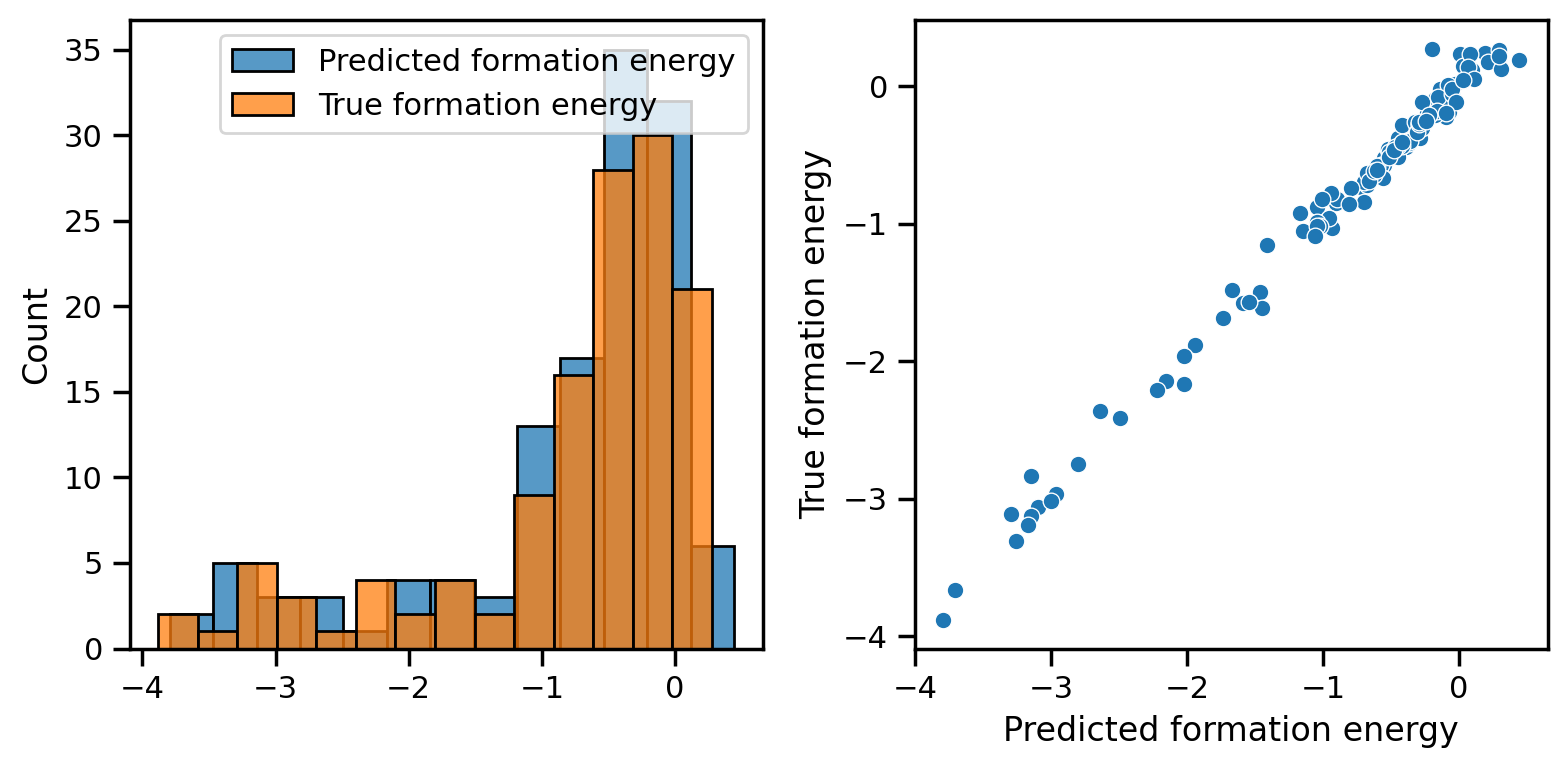

{
    'F1': 0.5,
    'DAF': 4.145748987854251,
    'Precision': 0.42105263157894735,
    'Recall': 0.6153846153846154,
    'Accuracy': 0.875,
    'TPR': 0.6153846153846154,
    'FPR': 0.09565217391304348,
    'TNR': 0.9043478260869565,
    'FNR': 0.38461538461538464,
    'TP': 8,
    'FP': 11,
    'TN': 104,
    'FN': 5,
    'MAE': 0.06456052637622633,
    'RMSE': 0.09838745656893036,
    'R2': 0.5604178169006102
}

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)